In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./data/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#NULL 값을 채워야 한다. fillna
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Sex 값 분포 :\n",titanic_df['Sex'].value_counts(),"\n")
print("Cabin 값 분포 \n:",titanic_df['Cabin'].value_counts(),"\n")
print("Embarked 값 분포 \n:",titanic_df['Embarked'].value_counts(),"\n")

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64 

Cabin 값 분포 
: N              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
A10              1
D21              1
B78              1
B19              1
B38              1
Name: Cabin, Length: 148, dtype: int64 

Embarked 값 분포 
: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64 



In [7]:
#Cabin data의 앞글자 뽑아오기 
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [8]:
titanic_df.groupby(['Sex','Survived'])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

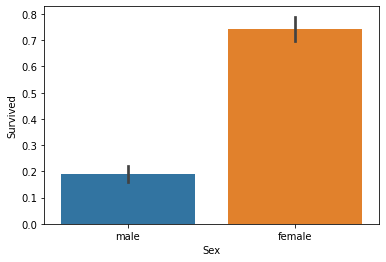

In [9]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

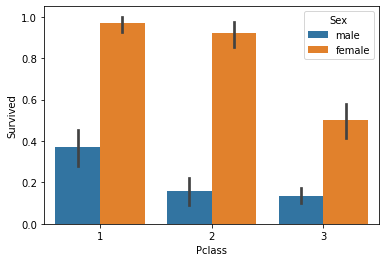

In [10]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [11]:
## lambda 인자 : 표현식      한줄로 함수를 만든다.
## apply() DataFrame에 적용

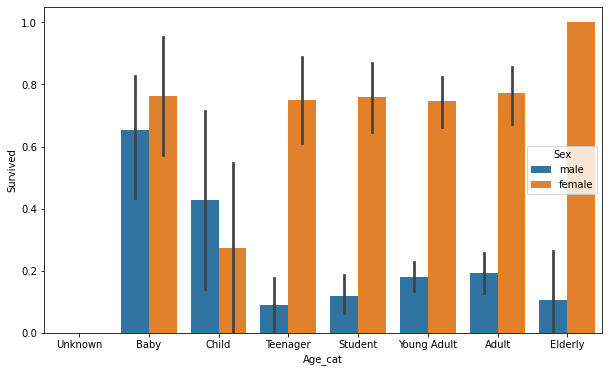

In [12]:
def get_category(age):
    cat = ""
    
    if age<=-1:
        cat="Unkown"
    elif age<=5:
        cat="Baby"
    elif age<=12:
        cat="Child"
    elif age<=18:
        cat="Teenager"    
    elif age<=25:
        cat="Student"    
    elif age<=35:
        cat="Young Adult"    
    elif age<=60:
        cat="Adult"    
    else:
        cat='Elderly'
        
    return cat

plt.figure(figsize=(10,6))

group_names = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]

#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop("Age_cat",axis=1,inplace=True)        
        

In [13]:
from sklearn import preprocessing 
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le =le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 피쳐 정리 및 함수화 

In [14]:

def fillna(df):
    df["Age"].fillna(df["Age"].mean(),inplace=True)
    df["Cabin"].fillna('N',inplace = True)
    df["Embarked"].fillna('N',inplace=True)
    df["Fare"].fillna(0,inplace=True)
    
    return df

def drop_feature(df):
    df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
    return df

def format_feature(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df 

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    
    return df 


In [15]:
#데이터 가공 
titanic_df = pd.read_csv("./data/train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

### 학습/예측/평가

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도 :{:.4f}".format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {:.4f}".format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {:.4f}".format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도 :0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 검증 
1. kfold
2. cross_val_score()

In [18]:
from sklearn.model_selection import KFold

In [19]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        #kfold.split 함수는 학습용,검증용 데이터를 row index 반환
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        #Classifier 학습/예측 정확도 계산 
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {} 정확도 : {:.4f}".format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도:{0:.4f}".format(mean_score))
    
#exec_kfold 호출 
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도:0.7823


In [20]:
#cross_val_score 는 StratifiedKFold 사용 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count , accuracy in enumerate(scores):
    print("교차검증 {} 정확도 : {:.4f}".format(iter_count,accuracy))
    
print("평균 정확도 : {:.4f}".format(np.mean(scores)))    

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


### GridSearchCV를 이용해 DecisionTreeClassifer의 최적 하이퍼 파라미터를 찾고 예측성능 측정 

[의사결정 트리 하이퍼파라미터](https://dsbook.tistory.com/154)

## 하이퍼 파라미터 

1. min_samples_split 

노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨
default 2 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능석 증가

2. min_samples_leaf

말단 노드가 되기 위한 최소한의 샘플데이터 수 
위와 유사하게 과적합 제어용도 

3. max_depth

트리의 최대 깊이 규정 
default None None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴 >> 과적함 가능성 증가

![과적합]("/Users/leejunseung/Desktop/Bigtato/overfitting.png")

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid = parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :",grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 :",grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도:{:.4f}".format(accuracy))



GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


# 성능지표/평가 

In [22]:
from IPython.display import Image

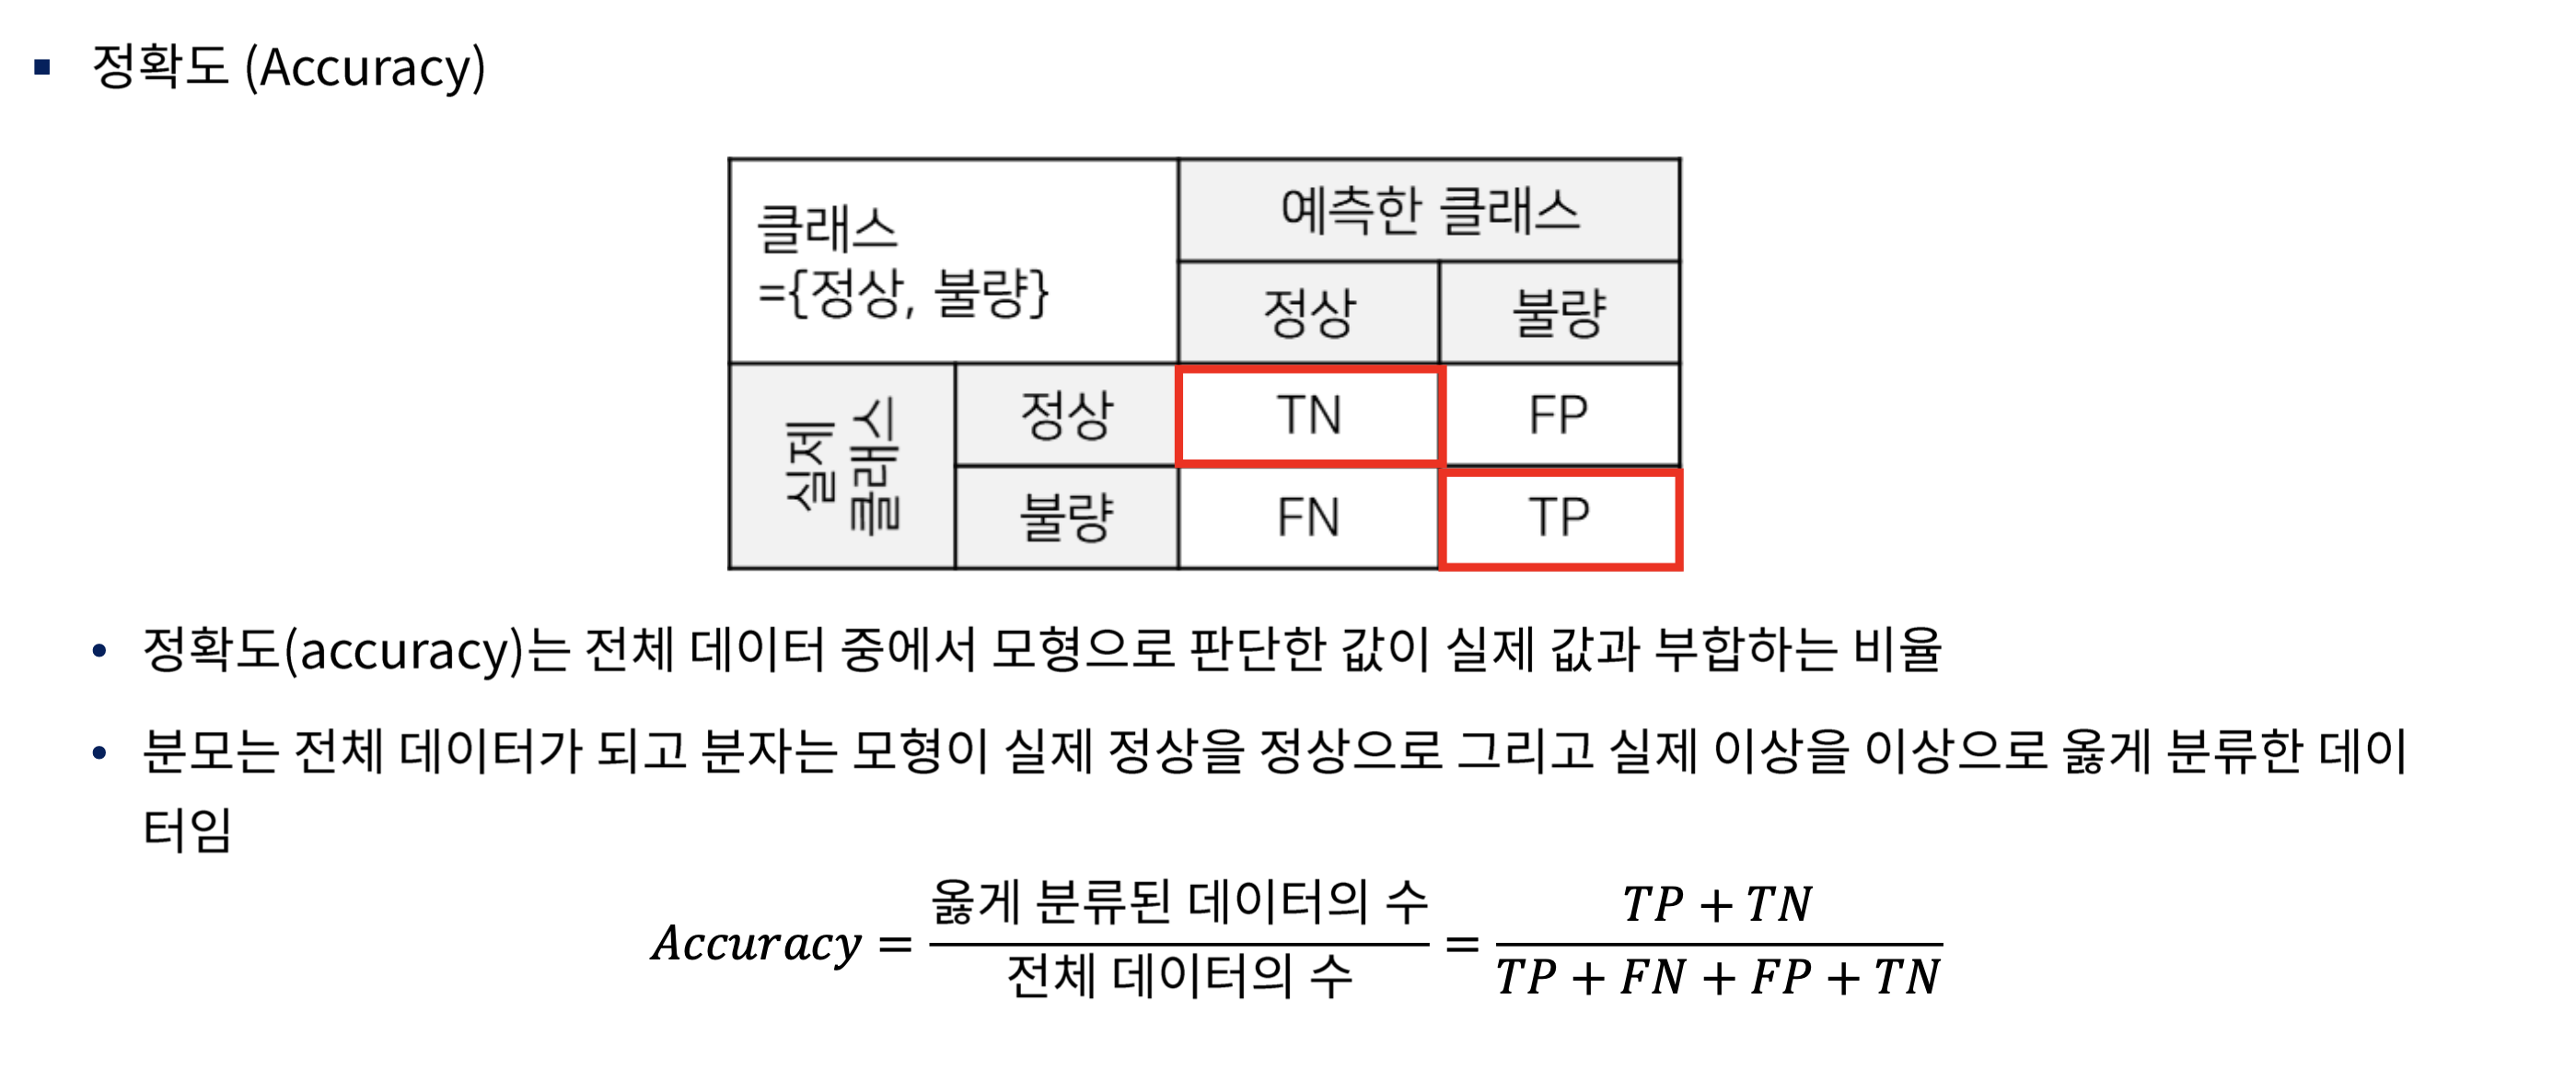

In [23]:
Image("accuracy.png")

In [24]:
from sklearn.base import BaseEstimator 

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==1:
                pred[i] = 0
            
            else:
                pred[i] = 1
                
        return pred

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("./data/train.csv")
y_train_df = train_df['Survived']
X_train_df = train_df.drop('Survived',axis=1)
X_train_df = transform_features(X_train_df)
X_train, X_test, y_train,y_test = train_test_split(X_train_df,y_train_df,test_size=0.2,random_state=777)

In [26]:
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print("Dummy classifier의 정확도 : {:.4f}".format(accuracy_score(y_test,mypredictions)))

Dummy classifier의 정확도 : 0.7821


### 결론 : 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가지표 아니다

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data ,y, random_state=777)

In [28]:
#불균형한 레이블 데이터 분포도 확인.
print('레이블 테스크 세트 크기: ',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스크 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    404
1     46
dtype: int64


In [29]:
#Dummy Classifier로 학습/예측/정확도 평가 
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print("모든 예측을 0으로 하여도 정확도: {:.3f}".format(accuracy_score(y_test,fakepred)))

모든 예측을 0으로 하여도 정확도: 0.898


## 오차행렬

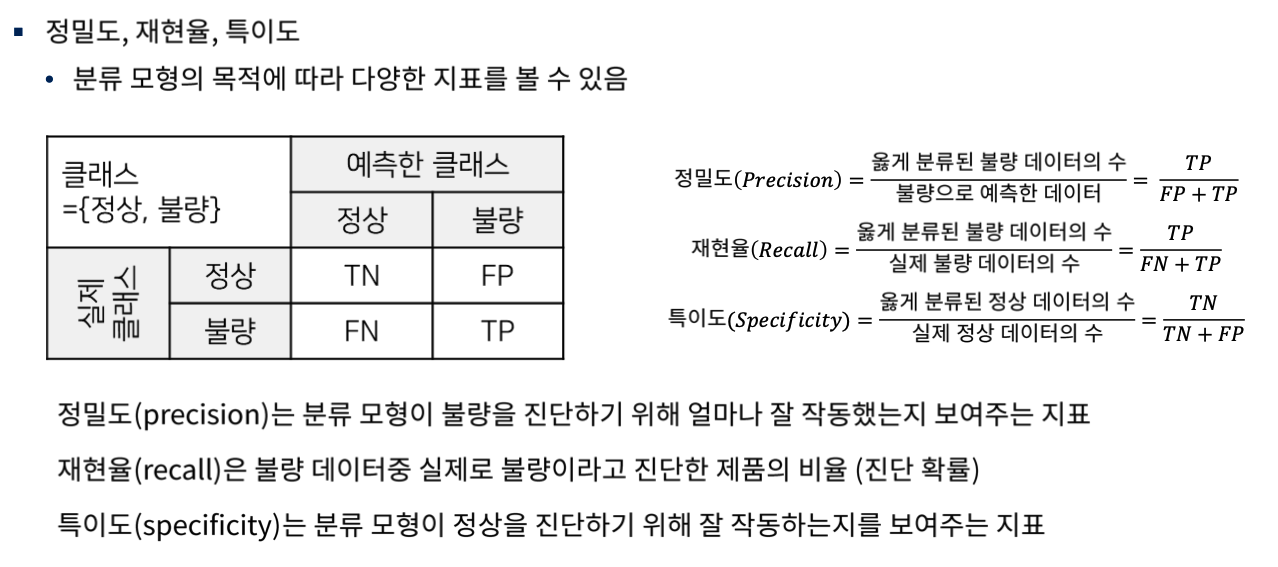

In [30]:
Image("data/aa.png")

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test,pred)
    acccuarcy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    print("정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}".format(acccuarcy,precision,recall))

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv('./data/train.csv')
y_train_df = train_df['Survived']
X_train_df = train_df.drop('Survived',axis=1)
X_train_df = transform_features(X_train_df)

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=777)

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[100  17]
 [ 17  45]]
정확도 : 0.8101, 정밀도 : 0.7258, 재현율 : 0.7258


/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#이진 분류에서 predict_proba()를 수행해 반환되는 ndarray는 첫번째 칼럼이 0에대한 확률 두번째가 1에 대한 확률을 나타낸다.

In [34]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba의 결과 Shape:{}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출\n",pred_proba[:3])

#예측확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인 
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n",pred_proba_result[:3])

pred_proba의 결과 Shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.37070642 0.62929358]
 [0.89465048 0.10534952]
 [0.86232575 0.13767425]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.37070642 0.62929358 1.        ]
 [0.89465048 0.10534952 0.        ]
 [0.86232575 0.13767425 0.        ]]


In [35]:
#Binarizer 클래스 
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]
#X의 개별 원소들이 threshold값보다 캍거나 작으면 0을, 크면 1을 반환 
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

#predict_proba 반환값의 두번째 칼럼 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)
#이전 로지스틱 회귀와 동일 >> predict 함수가 predict_proba에 기반함을 알 수 있다. 

오차행렬
[[100  17]
 [ 17  45]]
정확도 : 0.8101, 정밀도 : 0.7258, 재현율 : 0.7258


In [37]:
#threshold 조정 
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)
#임계값 낮추니 재현율 올라가고 정밀도 떨어짐 >> 임곗값이 Posititve 예측값을 결정하기 때문 더많은 값이 True가 된다.

오차행렬
[[97 20]
 [16 46]]
정확도 : 0.7989, 정밀도 : 0.6970, 재현율 : 0.7419


In [40]:
# 최적의 threshold값 제공하는 API
#precision_recall_curve() , 입력파라미터 y_true :실제 클래스값 배열, probas_pred: Positive칼럼의 예측 확률 배열 
#임곗값과 그 임곗값에 해당하는 정밀도 및 재혀늉ㄹ 값을 담은 넘파이 ndarray를 반환한다. 

from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print("반환된 분류 결정 임곗값의 배열의 Shape",thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],17)
print("샘플 추출을 위한 임계값 배여르이 index 10개 : ",thr_index)
print("샘플용 10개의 임곗값 :",np.round(thresholds[thr_index],2))

print("샘플 임계값별 정밀도 :",np.round(thresholds[thr_index],3))
print("샘플 임계값별 재현율",np.round(recalls[thr_index],3))




반환된 분류 결정 임곗값의 배열의 Shape (161,)
샘플 추출을 위한 임계값 배여르이 index 10개 :  [  0  17  34  51  68  85 102 119 136 153]
샘플용 10개의 임곗값 : [0.05 0.08 0.11 0.13 0.16 0.28 0.53 0.63 0.81 0.94]
샘플 임계값별 정밀도 : [0.049 0.083 0.105 0.129 0.156 0.276 0.525 0.635 0.815 0.937]
샘플 임계값별 재현율 [1.    0.952 0.919 0.839 0.79  0.758 0.694 0.548 0.387 0.129]


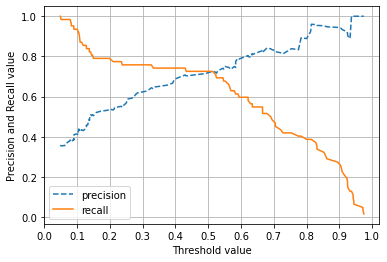

In [43]:
# 위 샘플값 시각화 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 thresholds에 따른 정밀도,재현율 ndarray추출 
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #X축을 threshold값으로 , Y축은 정밀도 재현율 값으로 각각 Plot수행 . 정밀도는 점선으로 표시 
    #plt.figure(figszie=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:thresholds_boundary],linestyle = '--',label='precision')
    plt.plot(thresholds,recalls[0:thresholds_boundary],label='recall')
    
    #threshold 값 X축을 Scale을 0.1단위로 변경 
    start ,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축,y축 label과 legend 그리고 grid 설정 
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])    

## F1 스코어

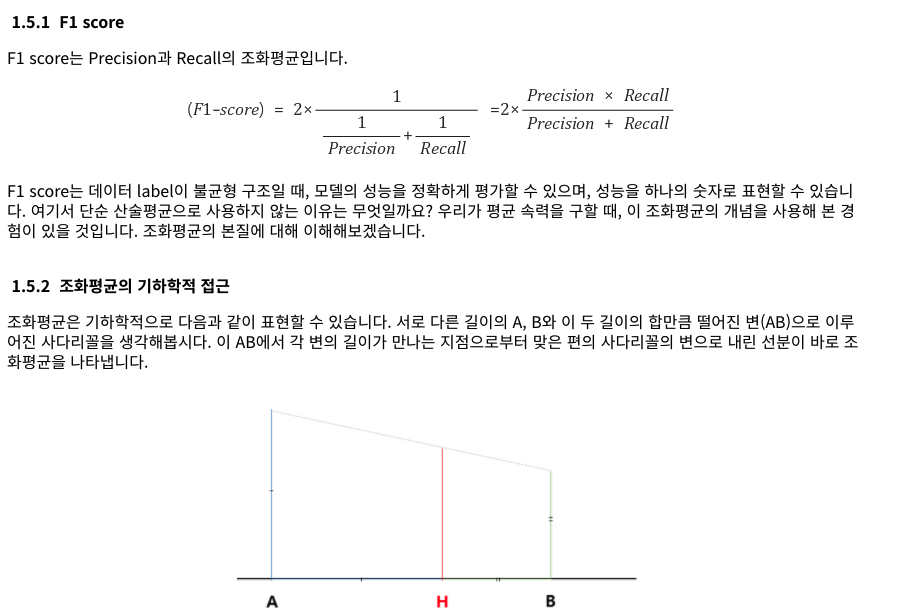

In [44]:
Image("f score.png")

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print("F1 스코어: {:.4f}".format(f1))

F1 스코어: 0.7258


In [49]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임게값: ",custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [51]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test,pred)
    acccuarcy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    #F1 스코어 추가 
    f1 = f1_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    #f1 score print 추가
    print("정확도: {:.4f}, 정밀도:{:.4f},재현율{:.4f},F1:{:.4f}".format(acccuarcy,precision,recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임게값:  0.4
오차행렬
[[97 20]
 [16 46]]
정확도: 0.7989, 정밀도:0.6970,재현율0.7419,F1:0.7188
임게값:  0.45
오차행렬
[[99 18]
 [17 45]]
정확도: 0.8045, 정밀도:0.7143,재현율0.7258,F1:0.7200
임게값:  0.5
오차행렬
[[100  17]
 [ 17  45]]
정확도: 0.8101, 정밀도:0.7258,재현율0.7258,F1:0.7258
임게값:  0.55
오차행렬
[[103  14]
 [ 20  42]]
정확도: 0.8101, 정밀도:0.7500,재현율0.6774,F1:0.7119
임게값:  0.6
오차행렬
[[108   9]
 [ 25  37]]
정확도: 0.8101, 정밀도:0.8043,재현율0.5968,F1:0.6852


## ROC 곡선과 AUC

 ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구한다.

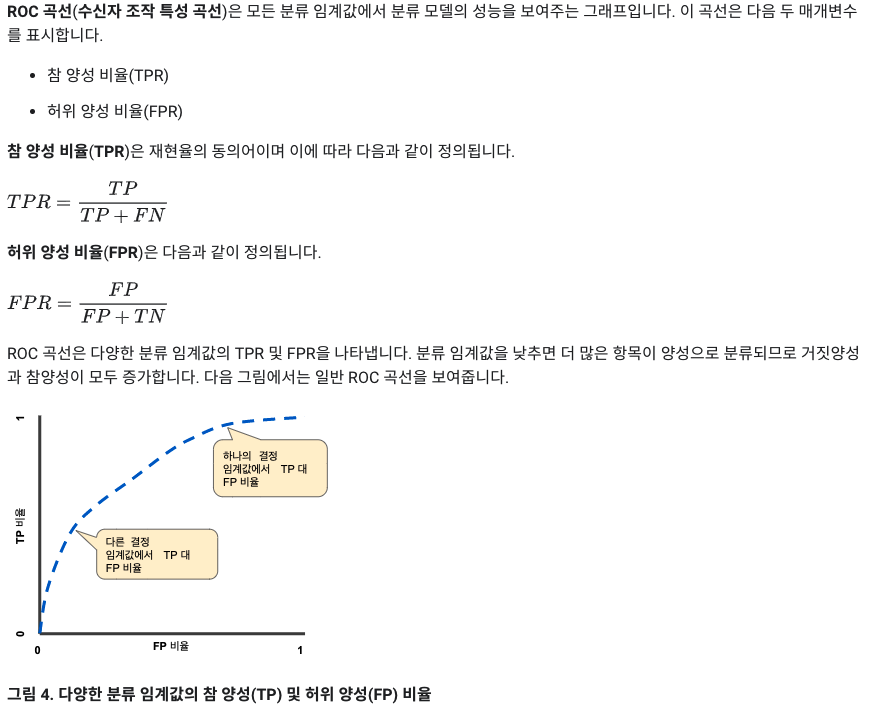

In [52]:
Image("roc_auc.png")

In [53]:
# roc curve()
# 입력 파라미터 , y_true: 실제 클래스 값 array y_score: predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률
#반환 값 : fpr,tpr,thresholds 

from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)

#임계값을 5step으로 추출 
thr_index = np.arange(0,thresholds.shape[0],5)
print("샘플 추출을 위한 임곗값 배열의 index 10개:",thr_index)
print("샘플용 10개의 임계값",np.round(thresholds[thr_index],2))

#5step 단위로 추출된 임계값에 따른 FPR,TPR값 
print("샘플 임곗값별 FPR:",np.round(fprs[thr_index],3))
print("샘플 임곗값별 TPR:",np.round(tprs[thr_index],3))


샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65]
샘플용 10개의 임계값 [1.97 0.8  0.68 0.63 0.58 0.55 0.4  0.24 0.14 0.13 0.11 0.1  0.09 0.05]
샘플 임곗값별 FPR: [0.    0.026 0.051 0.077 0.111 0.128 0.179 0.333 0.419 0.538 0.598 0.701
 0.795 0.949]
샘플 임곗값별 TPR: [0.    0.387 0.516 0.565 0.613 0.694 0.742 0.774 0.806 0.839 0.871 0.919
 0.952 0.984]


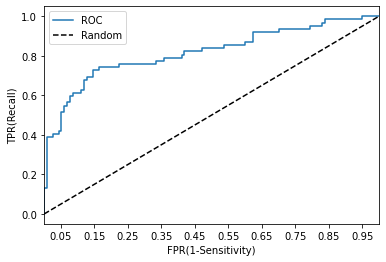

In [54]:
def roc_curve_plot(y_test,pred_proba_c1):
    #임계값에 따른 FPR,TPR값을 반환 받음 
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    
    #ROC 곡선을 그래프 곡선으로 그림 
    plt.plot(fprs,tprs,label='ROC')
    #가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR X축의 Scale을 0.1단위로 변경 , X,Y축 명 설정 
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim()
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])    
    